In [2]:
BASE_DIR = ""

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
img_width,img_height = 125,125
image_data = tf.keras.utils.image_dataset_from_directory(
    os.path.join(BASE_DIR,'images'),
    batch_size=32,
    image_size=(img_width,img_height),
    shuffle=True,
    seed=123,
    color_mode='rgb'
)

Found 732 files belonging to 3 classes.


In [5]:
class_names = image_data.class_names
class_names

['banana', 'mango', 'watermelon']

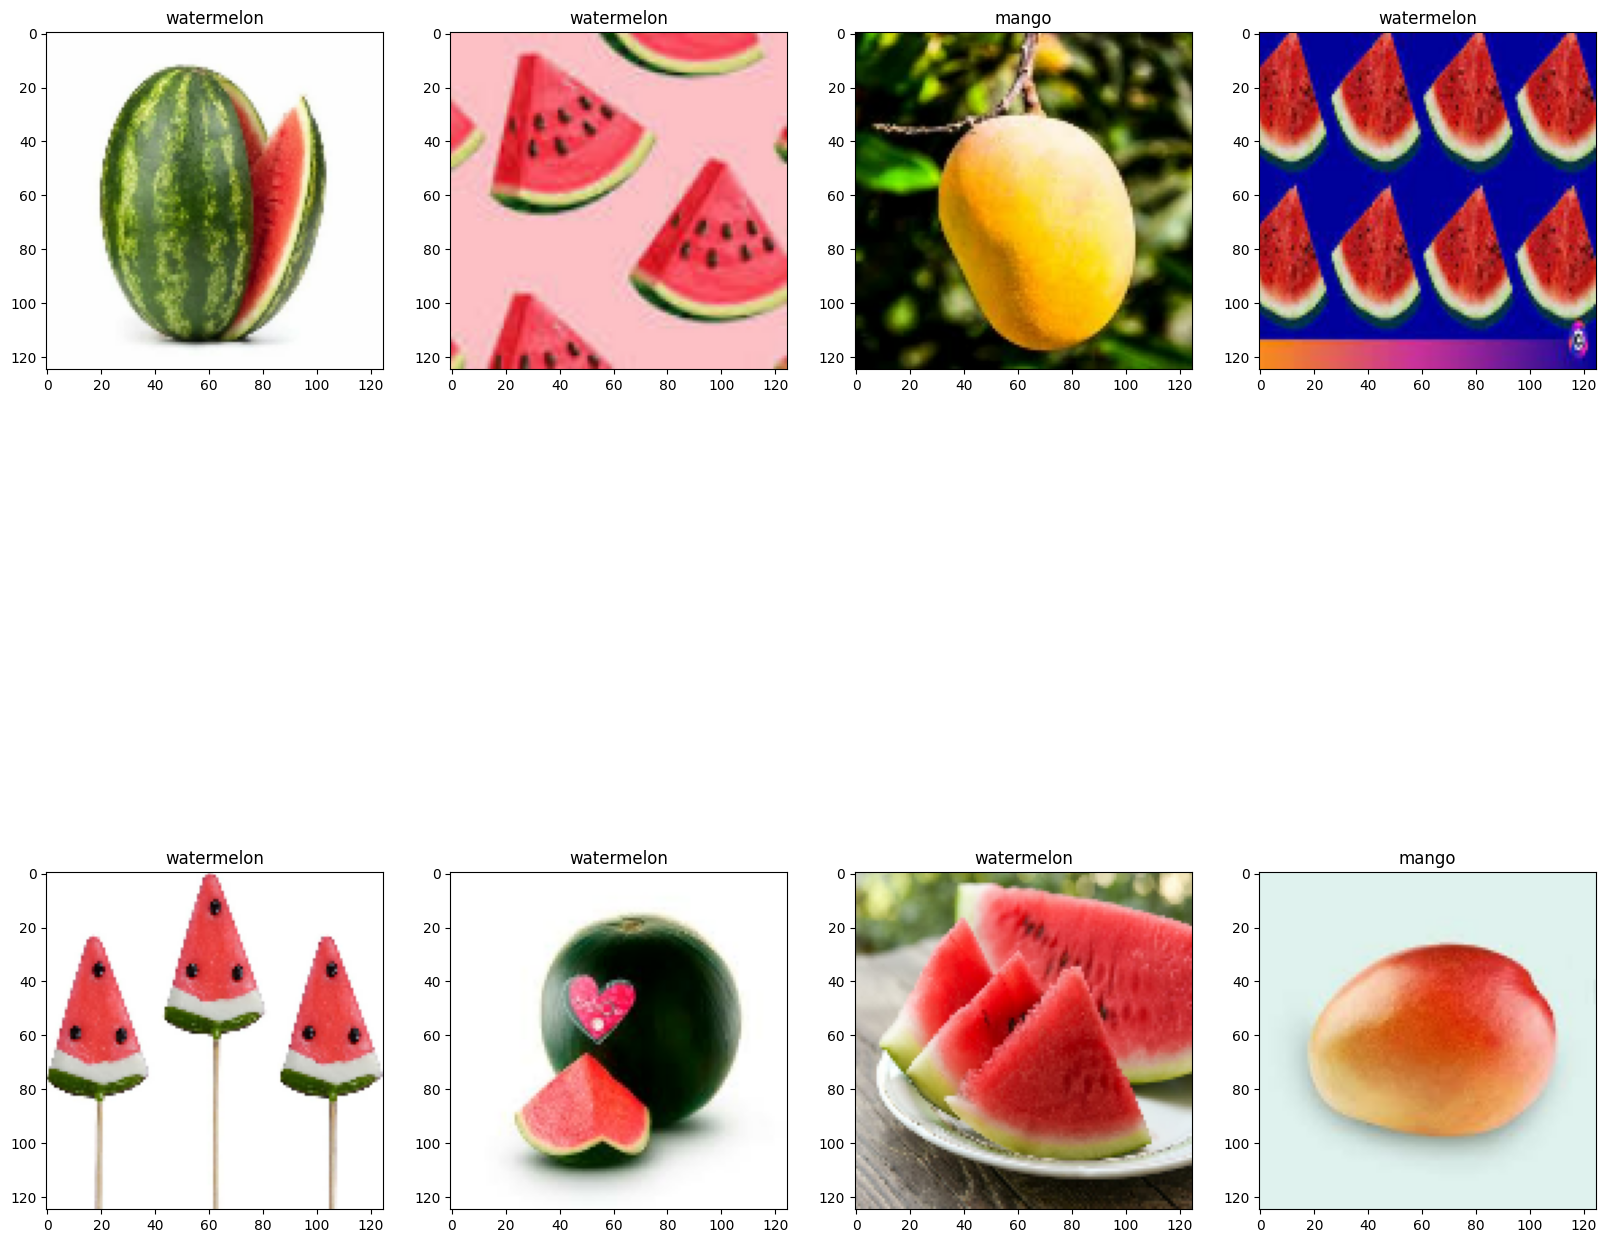

In [6]:
plt.figure(figsize=(20,20))
for images,labels in image_data.take(1):
    for i in range(8):
        ax = plt.subplot(2,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('on')

In [7]:
autotune = tf.data.AUTOTUNE

image_ds = image_data.cache().shuffle(1000).prefetch(buffer_size=autotune)

In [38]:
num_classes = len(class_names)

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
epochs=200
history = model.fit(
  image_ds,
  epochs=epochs
)

Epoch 1/200
23/23 [==============================] - 5s 24ms/step - loss: 0.9427 - accuracy: 0.5724
Epoch 2/200
23/23 [==============================] - 0s 20ms/step - loss: 0.7174 - accuracy: 0.7254
Epoch 3/200
23/23 [==============================] - 0s 20ms/step - loss: 0.6623 - accuracy: 0.7500
Epoch 4/200
23/23 [==============================] - 0s 17ms/step - loss: 0.6397 - accuracy: 0.7377
Epoch 5/200
23/23 [==============================] - 0s 17ms/step - loss: 0.5456 - accuracy: 0.7705
Epoch 6/200
23/23 [==============================] - 0s 17ms/step - loss: 0.5220 - accuracy: 0.7855
Epoch 7/200
23/23 [==============================] - 0s 17ms/step - loss: 0.4713 - accuracy: 0.7964
Epoch 8/200
23/23 [==============================] - 0s 17ms/step - loss: 0.4635 - accuracy: 0.8101
Epoch 9/200
23/23 [==============================] - 0s 17ms/step - loss: 0.4930 - accuracy: 0.7787
Epoch 10/200
23/23 [==============================] - 0s 17ms/step - loss: 0.4451 - accuracy: 0.8210

In [40]:
model.save(os.path.join(BASE_DIR,'models/3/'))

Url:https://thumbs.dreamstime.com/z/watermelon-26576027.jpg
1/1 [==============================] - 0s 98ms/step
watermelon


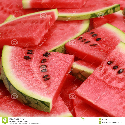

In [51]:
import random
import string

image_url = input('Url:')

image_path = tf.keras.utils.get_file(''.join(random.choices(string.ascii_lowercase)), origin=image_url)

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

img_arr = tf.keras.utils.img_to_array(img)
img_arr = tf.expand_dims(img_arr, 0)

print(class_names[np.argmax(tf.nn.softmax(model.predict([img_arr])))])
img